# **Project Name**    -  Bike Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**                - Harshit Shukla


# **Project Summary -**

The Seoul Bike Sharing Demand Dataset provides data on the number of rented bikes for every hour of the day in Seoul, South Korea, from December 2017 to November 2018. The data is useful for understanding bike rental trends and predicting bike rental demand.

The first phase of the project involved data wrangling.i have changed the Date column to datetime object that will help in EDA as well as modelling. Found out that around 295 rows of data had 0 Rented Bike Count since it was non functioning day. So we have dropped that rows so as to make data more consistent.

In the second phase, I conducted exploratory data analysis (EDA) to identify trends and patterns in the data. Some of the important findings are: demand for rented bikes increases as temperature increases to a certain level, demand was higher during non-holiday days, demand was lowest during winter and highest during summer, rainfall and snowfall had a negative impact on demand, demand is high during rush hours of the day etc. I used different types of charts like Histogram, Box Plot, Scatter Plot, Line Chart, Bar Chart, Correlation Heatmap etc.

Next, I conducted hypothesis testing to validate my findings from EDA. I used two-sample t-tests to test whether rented bike demand was higher in hot weather and during rush hour. I also used one-way ANOVA tests to test whether rented bike demand was different in different seasons. The results of these tests confirmed my findings from EDA.

The fourth phase involved feature engineering. I have capped the Rainfall and  Snowfall columns to categorical value like 0 for no snowfall and rainfall, and 1 value tell that there is rainfall and snowfall. I also used one-hot encoding for categorical features like Seasons, Holiday, and Functioning .Using the correlation matrix and heatmap I found out that the temperature and dew point temperature columns have very high coreration among them an this could lead to multicolinearity so I dropped the dew point temperature column. After that I applied data scaling to some columns that needed it using methods like StandardScaler and MinMaxScaler.

Next, I used five different machine learning models – Linear Regression, Ridge Regression, Decision Tree, Random Forest, and XGBoost – to predict rented bike demand. Using GridSearchCV and RandomSearchCV, I tuned the hyperparameters for each model and used cross-validation to evaluate their performance. Hyperparameter optimized XGBoost gave the best results, with an
 of 0.94 and an
 of 8.356.

Finally, I used SHAP values to interpret the XGBoost model. I found that Hour, Temperature, and Humidity were some of the most important features for predicting bike rental demand. Hour and Temperature had positive impact on demand whereas Humidity has negative impact in demand.

In conclusion, this project shows that bike rental demand in Seoul is influenced by weather conditions, day of the week, and season. To increase bike rental demand, companies can focus on promoting bike rental during good weather, non-holiday days, summer season etc. In addition to that, companies can use the insights gained from this project to optimize their rental pricing and inventory management.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


- With the growing demand and user base for bike-sharing system, providing the city with a stable supply of rental bikes could eventually become a challenging task. The success of bike-sharing system relies in ensuring that the quality of facilities provided, meets the needs and expectations of the users. Therefore, it is important to ensure that rental bikes are available and accessible to the users at right time ,as it reduces the waiting time. Forecasting the number of bikes required and identifying the key factors that influence the demand for rental bikes can greatly help in managing the bike-sharing system.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.compose import ColumnTransformer
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from scipy.stats import t
from scipy.stats import ttest_1samp ,ttest_ind
import pickle
warnings.filterwarnings("ignore")


In [2]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.0 MB/s eta 0:00:00


### Dataset Loading

In [3]:
# Load Dataset
df= pd.read_csv("SeoulBikeData.csv",encoding="unicode-escape")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Visualizing the missing values

### What did you know about your dataset?

The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018. It includes hourly observations of 14 columns, such as the date, time, number of rented bikes, weather conditions, and other factors that may influence bike rental demand.

This dataset contains more than 8000 rows and 14 columns of the data.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include="O").T

,count,unique,top,freq
Date,8760,365,01/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

- Date: The date of the observation.
- Rented Bike Count: The number of bikes rented during the observation period.
- Hour: The hour of the day when the observation was taken.
- Temperature(°C): The temperature in Celsius at the time of observation.
- Humidity(%): The percentage of humidity at the time of observation.
- Wind speed (m/s): The wind speed in meters per second at the time of observation.
- Visibility (10m): The visibility in meters at the time of observation.
- Dew point temperature(°C): The dew point temperature in Celsius at the time of observation.
- Solar Radiation (MJ/m2): The amount of solar radiation in mega-joules per square meter at the time of observation.
- Rainfall(mm): The amount of rainfall in millimeters during the observation period.
- Snowfall(cm): The amount of snowfall in centimeters during the observation period.
- Seasons: The season of the year when the observation was taken.
- Holiday: Whether the observation was taken on a holiday or not.
- Functioning Day: Whether the bike sharing system was operating normally or not during the observation period.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
df.rename(columns={"Temperature(°C)":"Temp","Humidity(%)":"Humidity","Visibility (10m)":"Visibilty",
                   "Dew point temperature(°C)":"Dew point temperature","Solar Radiation (MJ/m2)":"Solar Radiation",
                  "Rainfall(mm)":"Rainfall","Snowfall (cm)":"Snowfall","Wind speed (m/s)":"Wind Speed"},inplace=True)

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temp,Humidity,Wind Speed,Visibilty,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
df["Date"]=pd.to_datetime(df["Date"],format='%d/%m/%Y')

In [18]:
df.groupby("Seasons")["Rented Bike Count"].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

In [19]:
temp=df.groupby("Holiday")["Rented Bike Count"].sum()
print(temp)

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64


In [20]:
l=len(df[df["Holiday"]=="No Holiday"])/24
print("Average daily Rented Bike Count on Holiday is")
print("-"*34)
print(temp["No Holiday"]/l)

Average daily Rented Bike Count on Holiday is
----------------------------------
17165.472622478384


In [21]:
l=len(df[df["Holiday"]=="Holiday"])/24
print("Average daily Rented Bike Count on no holiday is")
print("-"*34)
print(temp["Holiday"]/l)

Average daily Rented Bike Count on no holiday is
----------------------------------
11994.166666666666


<span style = "color:blue">
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<span>    


    -Average daily Rented Bike Count for no holiday is 17165.4 bikes rented per day  
    -Average daily Rented Bike Count for holidays is 11994.1 bikes rented per day  

In [22]:
df.groupby(df["Date"].dt.month_name())["Rented Bike Count"].sum().sort_values()

Date
January      150006
February     151833
December     185330
March        380594
November     465715
April        524227
October      650675
August       651887
September    673612
May          707088
July         734460
June         896887
Name: Rented Bike Count, dtype: int64

In [23]:
df.groupby("Hour")["Rented Bike Count"].sum().sort_values(ascending=False)

Hour
18    548568
19    436229
17    415556
20    390172
21    376479
8     370731
16    339677
22    336821
15    302653
14    276971
13    267635
12    255296
23    244961
9     235784
7     221192
11    219311
0     197633
10    192655
1     155557
2     110095
6     104961
3      74216
5      50765
4      48396
Name: Rented Bike Count, dtype: int64

In [24]:
df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [25]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [26]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [27]:
df.groupby("Functioning Day")["Rented Bike Count"].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [28]:
df.drop(df[df['Functioning Day']=='No'].index,inplace=True)
df.reset_index(inplace=True)

In [29]:
df.drop(columns='Functioning Day',inplace=True)

In [30]:
# Seggregating numerical and categorical columns

categorical_columns=df.select_dtypes(include="O")
numerical_columns=df.select_dtypes(exclude=["O","datetime64"])

### What all manipulations have you done and insights you found?

First of all I checked for duplicate data and missing values, found 0 in both cases. Changed datatype of Date column which represent the date of observing the data to datetime to better access the data functions provided by pandas. I found out that dataset contains information from Dec 2017 to Nov 2018, so we don't have enough data to find patterns/trends over years.

Although visualization is better to get insight of the data that will be done in next section, I tried to understand bike rentals demand levels accross seasons (summer has highest demand and winter has lowest), Holiday has less demand compared to non holiday maybe because there are more people who use rented bikes to go to offices, schools etc on non holiday. As expected non functioning day has zero demand. We may need to drop all the rows with non functioning day as we'll be trying to predict demand when the rental bike service is functioning

I also found out the average of bikes rented in various situations like on holidays and on non holidays, also found out the average rented bike count on daily and hourly basis and at last dropped the rows which contains the data of non functioning day because bike rented on that day is zero and at last dropped the functioning day column beacause it has now become constant column and will not help in model creation but will only increase the computational cost. And also created two types of list one containing categorical columns and other having numerical columns which will be used in further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

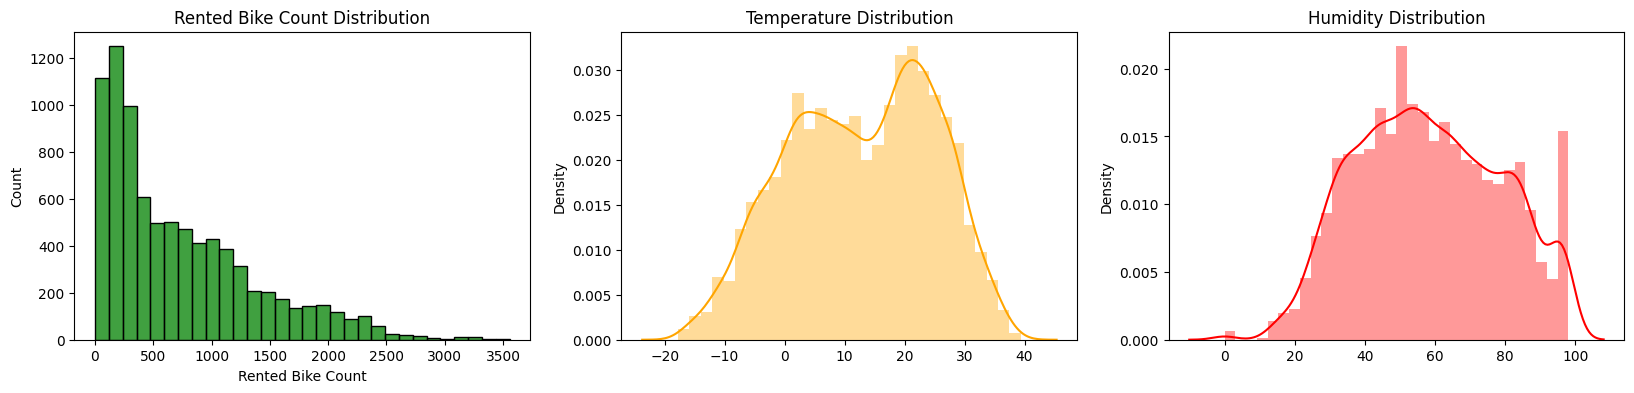

In [31]:
# Chart - 1 visualization code
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.histplot(x=df["Rented Bike Count"],color="green",bins=30)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,3,2)
sns.distplot(x=df["Temp"],kde=True,color="orange")
plt.title("Temperature Distribution")

plt.subplot(1,3,3)
sns.distplot(x=df["Humidity"],kde=True,color="red")
plt.title("Humidity Distribution")


plt.show()

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the distributions of various columns


##### 2. What is/are the insight(s) found from the chart?

Rented Bike Count is right skewed. It means that most of the data falls on the lower end of the scale, and there are relatively fewer instances where a large number of bikes were rented. Temperature and Humidity are distributed normally and al the properties of normal distribution will be followed by them



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the factors that impact the demand for bike sharing services, the company can make better-informed decisions on where to allocate their resources in the peak and the down seasons

#### Chart - 2

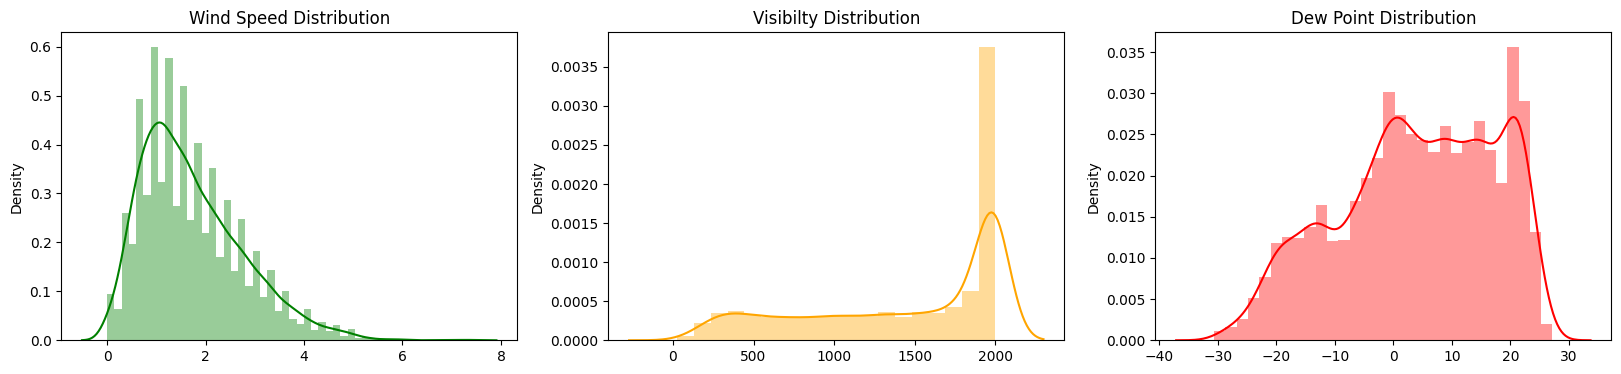

In [32]:
# Chart - 2 visualization code
# Chart - 1 visualization code
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(x=df["Wind Speed"],kde=True,color="green")
plt.title("Wind Speed Distribution")

plt.subplot(1,3,2)
sns.distplot(x=df["Visibilty"],kde=True,color="orange")
plt.title("Visibilty Distribution")

plt.subplot(1,3,3)
sns.distplot(x=df["Dew point temperature"],kde=True,color="red")
plt.title("Dew Point Distribution")


plt.show()

##### 1. Why did you pick the specific chart?

  The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

  Thus, I used the histogram plot to analysis the distributions of various columns


##### 2. What is/are the insight(s) found from the chart?

This is used to find the distribution of the data and will be used in future

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  By understanding the factors that impact the demand for bike sharing services, the company can make better-informed decisions on where to allocate their resources in the peak and the down seasons

#### Chart - 3

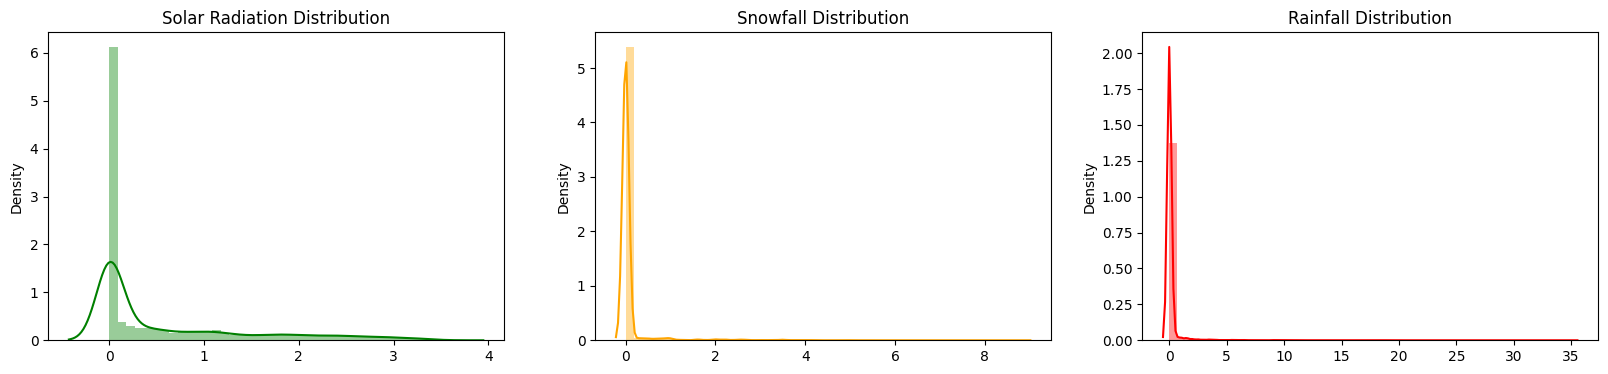

In [33]:
# Chart - 3 visualization code
# Chart - 1 visualization code
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(x=df["Solar Radiation"],kde=True,color="green")
plt.title("Solar Radiation Distribution")

plt.subplot(1,3,2)
sns.distplot(x=df["Snowfall"],kde=True,color="orange")
plt.title("Snowfall Distribution")

plt.subplot(1,3,3)
sns.distplot(x=df["Rainfall"],kde=True,color="red")
plt.title("Rainfall Distribution")


plt.show()

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the distributions of various columns


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the factors that impact the demand for bike sharing services, the company can make better-informed decisions on where to allocate their resources in the peak and the down seasons


#### Chart - 4

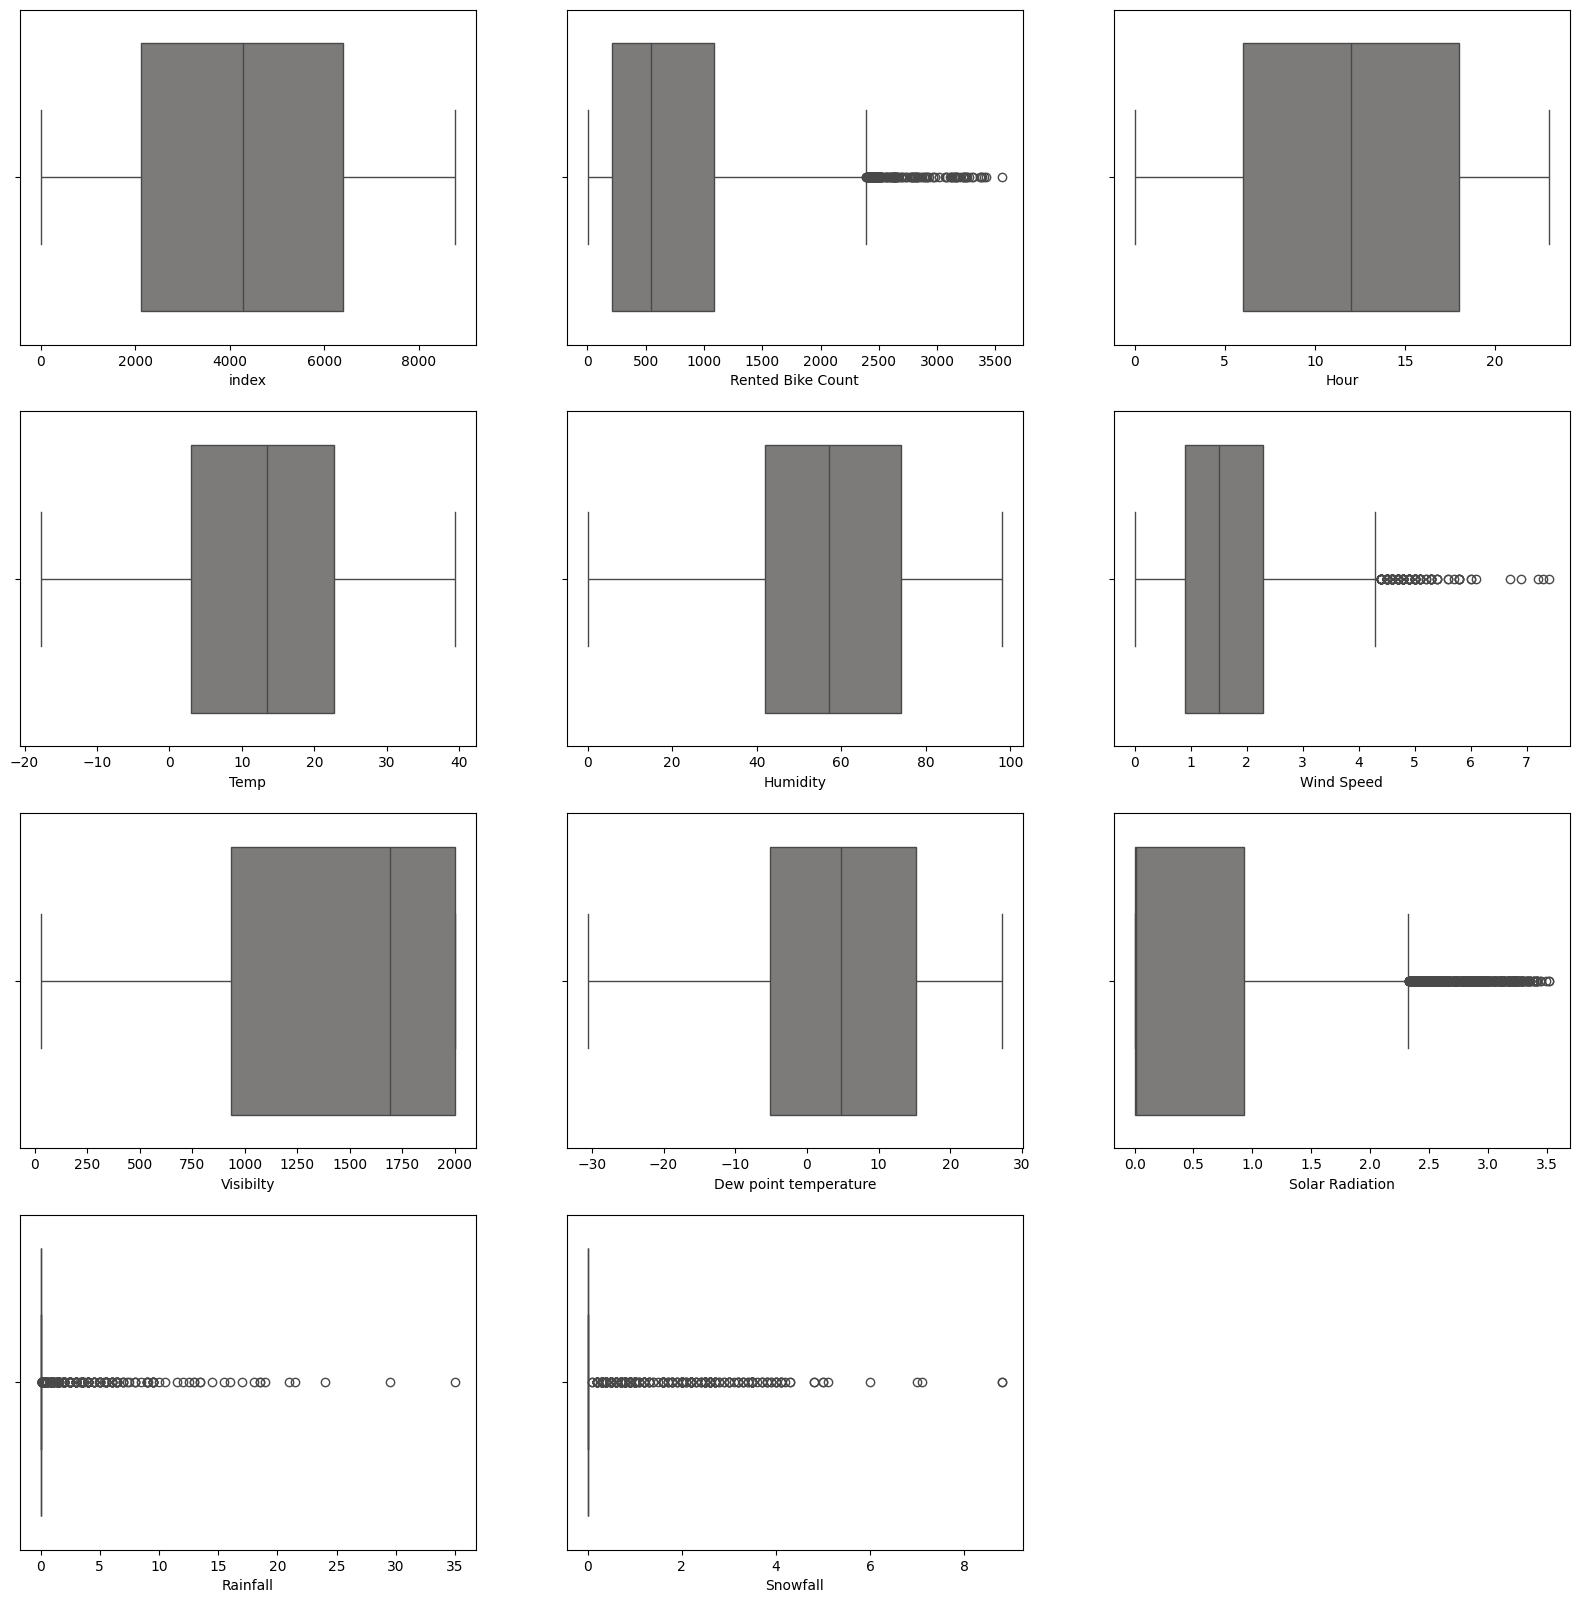

In [34]:
# Chart - 4 visualization code
n=1
plt.figure(figsize=(20,20))
for i in numerical_columns:
    plt.subplot(4,3,n)
    n=n+1
    sns.boxplot(x=numerical_columns[i],palette="cividis")

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value of different continuous features.

##### 2. What is/are the insight(s) found from the chart?

Temperature, Dew Point Temperature and Humidity are approx normally distributed and rest are not.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we can use this information to transform certain features so that we can train more robust and ccurate model wihch will help in demand prediction.



#### Chart - 5

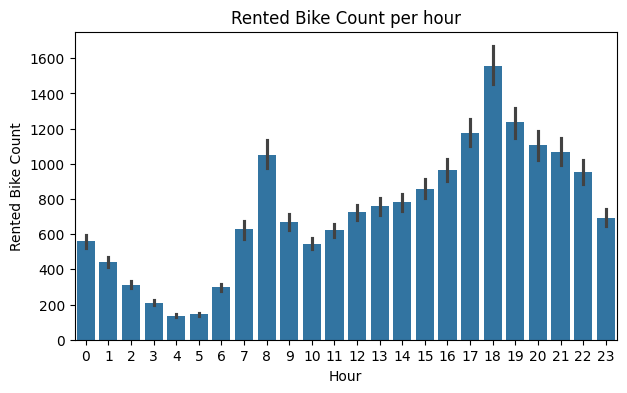

In [35]:
# chart 5 visualisation code
plt.figure(figsize=(7,4))
sns.barplot(x=df["Hour"],y=df["Rented Bike Count"])
plt.title("Rented Bike Count per hour")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the avg rented bike demandover different months, I have used Bar Chart.

    

##### 2. What is/are the insight(s) found from the chart?

   Demand of bikes is highest between 5-7 pm in a day which is obvious beacause most of the workingf professionals leave their offices at this time of the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the demand trend over different months, the company can optimize its operations, resources, pricing to meet the demand and maximize revenue. For example, during peak hours, the company can increase the number of bikes available and adjust pricing strategies to maximize revenue. Additionally, during the low-demand hours the company can reduce the number of bikes available and offer promotions or discounts to attract customers.



#### Chart - 6

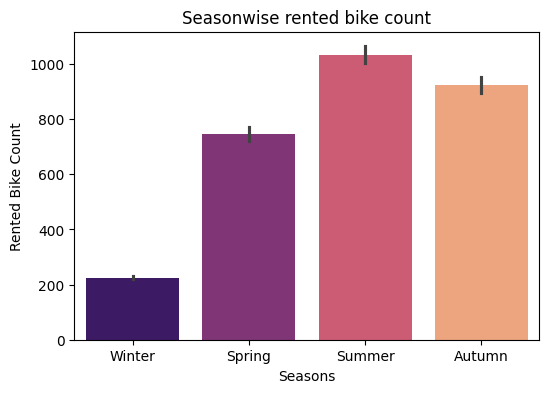

In [36]:
# Chart - 6 visualization code
plt.figure(figsize=(6,4))
sns.barplot(x=df["Seasons"],y=df["Rented Bike Count"],palette="magma")
plt.title("Seasonwise rented bike count")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the avg rented bike demandover different months, I have used Bar Chart.



##### 2. What is/are the insight(s) found from the chart?

Rentals Bike demand is highest in summer season and lowest in winter season.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This finding can help the bike sharing company plan its operations more effectively by increasing the number of bikes available during the peak season and reducing them during the off-season. The company can also consider offering seasonal promotions to encourage more rentals during the off-season.



#### Chart - 7

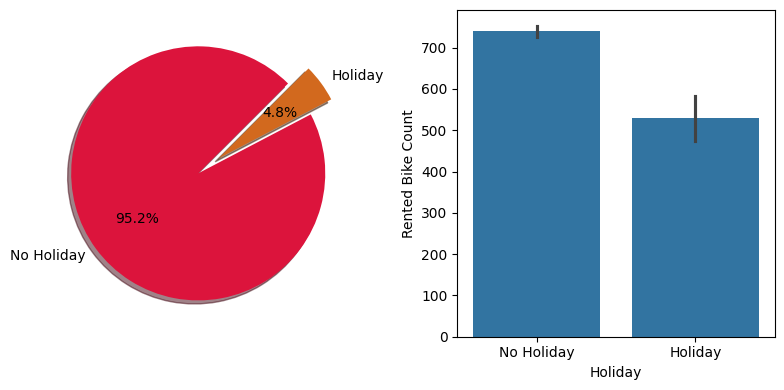

In [37]:
# Chart - 7 visualization code
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.pie(df["Holiday"].value_counts(),shadow=True,autopct="%1.1f%%",labels=["No Holiday","Holiday"],explode=(0,0.2),startangle=45,colors=["crimson","chocolate"])

plt.subplot(1,2,2)
sns.barplot(x=df["Holiday"],y=df["Rented Bike Count"])
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 A pie chart is a type of graph representing data in a circular form, with each slice of the circle representing a fraction or proportionate part of the whole

##### 2. What is/are the insight(s) found from the chart?

  Non holidays have more demand compared to holidays maybe because alot of people uses rentals bike for going to offices/schools on non holidays.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, Companies can start campaigns to promote going out to have fun so that more people rent their bikes.

#### Chart - 8

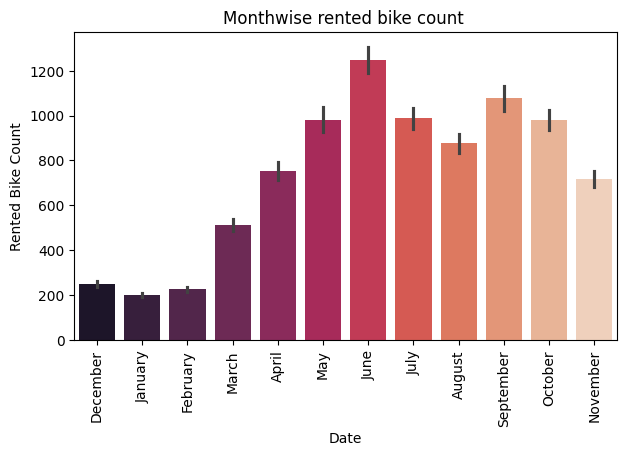

In [38]:
# Chart - 8 visualization code
plt.figure(figsize=(7,4))
sns.barplot(x=df["Date"].dt.month_name(),y=df["Rented Bike Count"],palette="rocket")
plt.xticks(rotation="vertical")
plt.title("Monthwise rented bike count ")
plt.show()

##### 1. Why did you pick the specific chart?

  Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the avg rented bike demandover different months, I have used Bar Chart.

    

##### 2. What is/are the insight(s) found from the chart?

  Rentals Bike demand is more in summer months like May, June, Jult etc compared to winter months like December, January, February etc.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, by understanding the demand trend over different months, the company can optimize its operations, resources, pricing to meet the demand and maximize revenue. For example, during peak months (May, June, July), the company can increase the number of bikes available and adjust pricing strategies to maximize revenue. Additionally, during the low-demand months (Dec, Jan, Feb), the company can reduce the number of bikes available and offer promotions or discounts to attract customers.



#### Chart - 9

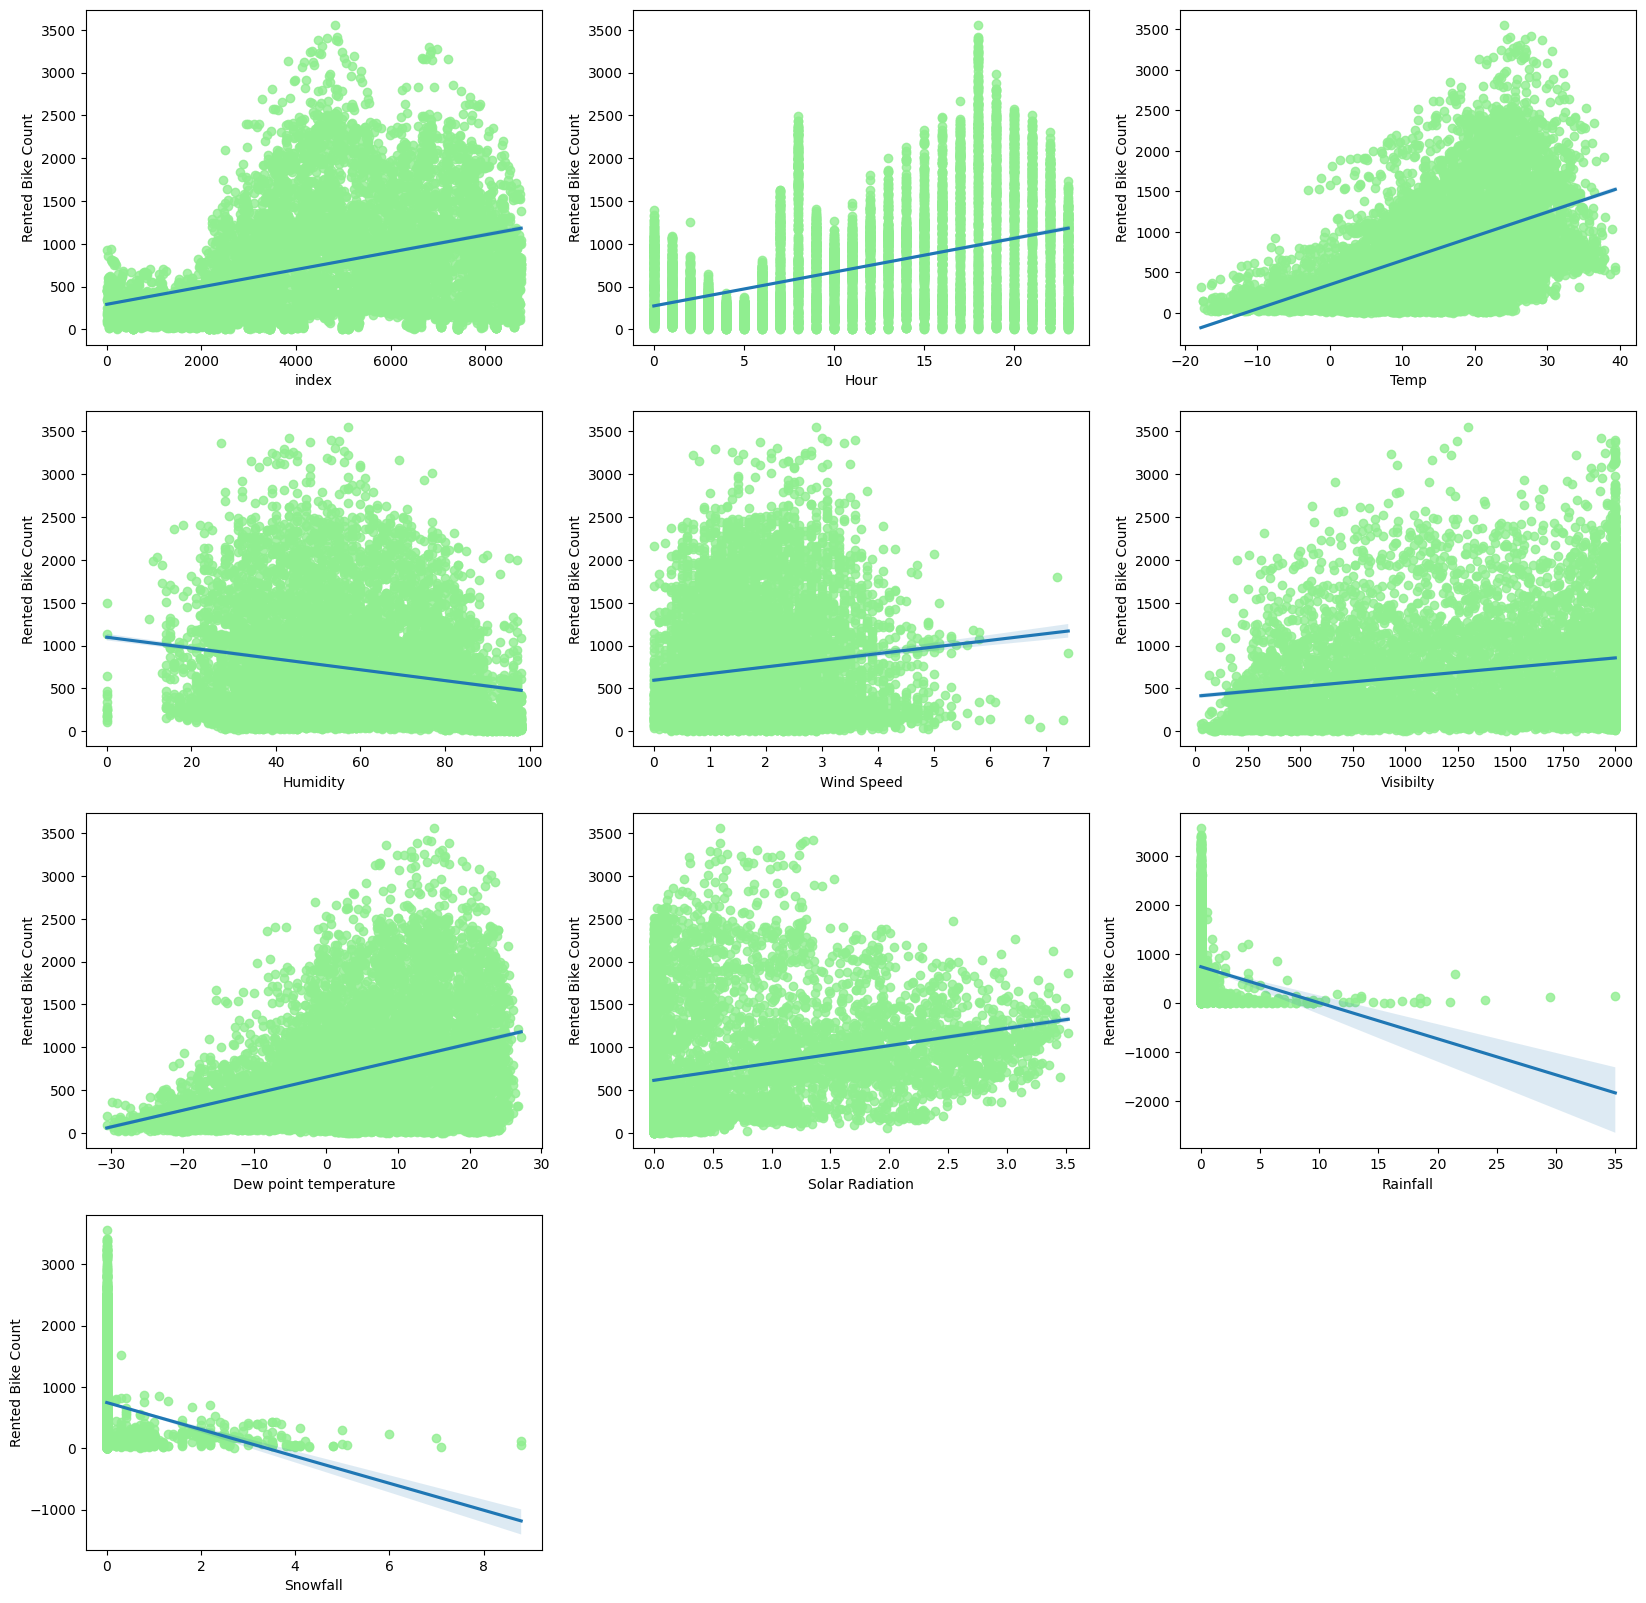

In [39]:
# Chart - 9 visualization code
n=1
plt.figure(figsize=(20,20))
for i in numerical_columns:
    plt.subplot(4,3,n)
    if i!="Rented Bike Count":
        n=n+1

        sns.regplot(x=numerical_columns[i],y=df["Rented Bike Count"],scatter_kws={"color":"lightgreen"})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

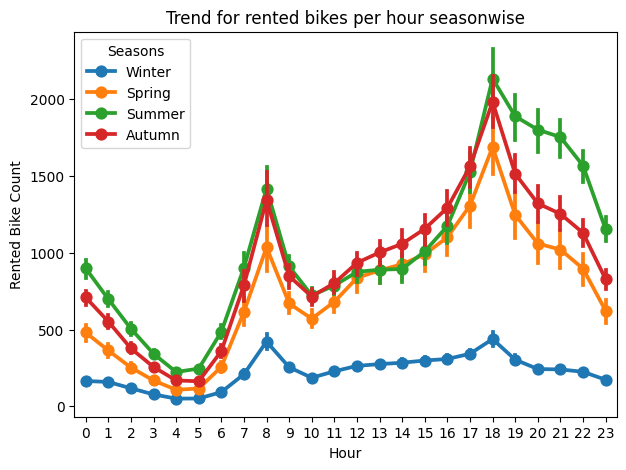

In [40]:
# Chart - 10 visualization code
plt.figure(figsize=(7,5))
sns.pointplot(x=df["Hour"],y=df["Rented Bike Count"],hue=df["Seasons"])
plt.title("Trend for rented bikes per hour seasonwise")
plt.show()

##### 1. Why did you pick the specific chart?

  Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.



##### 2. What is/are the insight(s) found from the chart?

  The Rentals Bike demand trend pattern is same for all the seasons only levels are different. Demand level in winter is lowest and highest in Summer



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, during the summer months when demand is highest, the company can increase the number of bikes available, hire more staff, and promote the service to attract more customers. Similarly, during the winter months when demand is lowest, the company can reduce its operations and allocate its resources to other areas of the business.And daily pattern is same for all the seasons hence daily strategy (rush hour & non rush hour) is same all over the year.

#### Chart - 11

<Axes: >

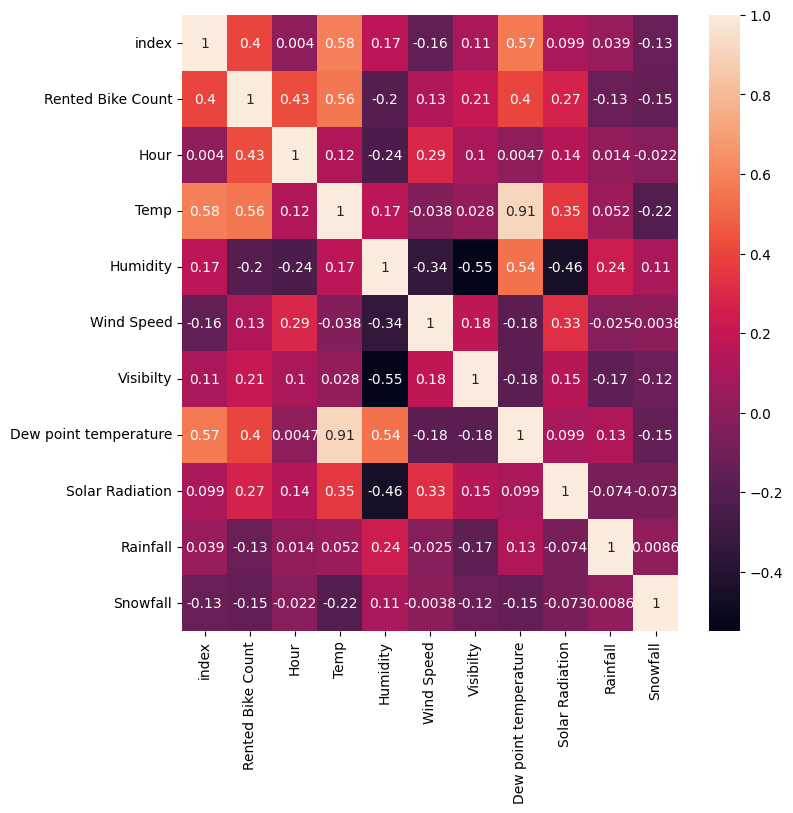

In [41]:
# Chart - 11 visualization code
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

##### 1. Why did you pick the specific chart?

  A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].



##### 2. What is/are the insight(s) found from the chart?

The temperature and dew point temperature features are highly correlated which my create difficulties in model interpretation after training, so we may need to drop one of them.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 We need to drop any one between these two columns so as to reduce multicolinearity

#### Chart - 12

In [42]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [43]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [44]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [45]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

    Company is claiming that Number of bikes rented per hour is 900 units
    
    h0= rented bike = 900 per hour
    hA= rented bike != 900

    Two tailed test
    alpha =0.05

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
data= df["Rented Bike Count"].sample(100)
test,pvalue=ttest_1samp(data,900)

In [47]:
if pvalue < 0.05:
  print("Reject the NULL hypothesis")
else:
  print("Failed to reject NULL Hypothesis")

Reject the NULL hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used t test to test this hypothesis

##### Why did you choose the specific statistical test?

The t test is used to check if there is significant difference between the claimed value and the original sample statistic and on the basis of this t statistic NULL hypothesis is either rejected or accepted

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

    Average rented bike count in Summer is higher than in winter

    H0=  average rented bike count is same all throughout the seasons
    H1=  average in summer is higher than in winter

    alpha = 0.05
    One tailed test

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
summer=df[df["Seasons"]=="Summer"]["Rented Bike Count"]
winter=df[df["Seasons"]=="Winter"]["Rented Bike Count"]
s1=summer.sample(100)
w1=winter.sample(100)
statistic,pvalue=ttest_ind(s1,w1)
pvalue=pvalue/2

In [49]:
if pvalue<0.05:
    print("Reject the NULL hypothesis")
else:
    print("Failed to reject NULL hypothesis")

Reject the NULL hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected

##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the Summer and winter months.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [52]:
# Transform Your data
transform=FunctionTransformer(func=np.log1p,inverse_func=np.expm1)

In [53]:
df[["Rented Bike Count","Wind Speed","Snowfall","Rainfall"]]=transform.fit_transform(df[["Rented Bike Count","Wind Speed","Snowfall","Rainfall"]])

 I have used log transformation on columns Rented Bike Count, Wind Speed, Snowfall, Rainfall ,Solar Radiation beacause they are right skewed and most of the algorithms work best on normally distributed data.

### 3. Categorical Encoding


In [54]:
# Encode your categorical columns
encoder= OneHotEncoder(drop="first")
cf1=ColumnTransformer([("Onencoder",encoder,[12,13])],remainder="passthrough")
enc=cf1.fit_transform(df)

In [55]:
df=pd.DataFrame(enc,columns=cf1.get_feature_names_out())

In [56]:
df.drop(columns=["remainder__index"],inplace=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

 I have used OneHotEncoding to change categorical data to numerical data, this technique is used because it will assign  equal weights to the values unlike of the label encoding which will give more waits to different values

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [57]:
# Expand Contraction

#### 2. Lower Casing

In [58]:
# Lower Casing

#### 3. Removing Punctuations

In [59]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [60]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [61]:
# Remove Stopwords

In [62]:
# Remove White spaces

#### 6. Rephrase Text

In [63]:
# Rephrase Text

#### 7. Tokenization

In [64]:
# Tokenization

#### 8. Text Normalization

In [65]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [66]:
# POS Taging

#### 10. Text Vectorization

In [67]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [68]:
# # Manipulate Features to minimize feature correlation and create new feature
df["remainder__month"]=df["remainder__Date"].dt.month
df["remainder__year"]=df["remainder__Date"].dt.year



def change (x):
    if x>0 :
        return 1
    else:
        return 0

df["remainder__Snowfall"]=df["remainder__Snowfall"].apply(change)

df['remainder__Rainfall']=df['remainder__Rainfall'].apply(lambda x : 1 if x>0 else 0)


#### 2. Feature Selection

In [69]:
# Select your features wisely to avoid overfitting
df.drop(columns=["remainder__Date"],inplace=True)
df.drop(columns=["remainder__Dew point temperature"],inplace=True)


##### What all feature selection methods have you used  and why?

Correlation method is used to select these columns dew point temperature because it is highly correlated to temperature and in the resultant model it will lead to multicolinearity if not removed.Date column i also dropped because it is also not going to help the modl building process

##### Which all features you found important and why?

 Based on EDA and correlation heatmap in above section, we saw various features that has impact on target variable output. For example, we saw how temperature increase causes demand to increase, rainfall and snowfall decreases the demand, certain seasons have higher demand compared to other seasons, certain hour (rush hour) have more demand, visibility has posivitive effect on demand, too much humidity decreases demand etc.

    

### 5. Handling Outliers

In [70]:
iqr=df["remainder__Solar Radiation"].quantile(0.75)-df["remainder__Solar Radiation"].quantile(0.25)
df["remainder__Solar Radiation"].quantile(0.75)+(iqr*1.5)

2.325

In [71]:
temp=df[df["remainder__Solar Radiation"]>2.35].index
df.loc[temp,"remainder__Solar Radiation"]=2.35

In [72]:
df["remainder__Wind Speed"]=df["remainder__Wind Speed"].astype("float")

iqr=df["remainder__Wind Speed"].quantile(0.75)-df["remainder__Wind Speed"].quantile(0.25)
df["remainder__Wind Speed"].quantile(0.75)+(iqr*1.5)

2.022025341922494

In [73]:
temp=df[df["remainder__Wind Speed"]>2.02].index
df.loc[temp,"remainder__Wind Speed"]=2.02

<Axes: xlabel='remainder__Wind Speed'>

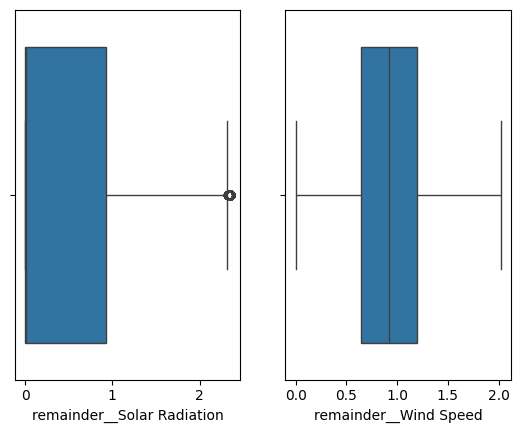

In [74]:
plt.subplot(1,2,1)
sns.boxplot(x=df["remainder__Solar Radiation"])

plt.subplot(1,2,2)
sns.boxplot(x=df["remainder__Wind Speed"])

##### What all outlier treatment techniques have you used and why did you use those techniques?


We have used Inter Quartile Range method to remove the outliers in our data .Wind speed and solar radiation are the columns which have normal like distribution but was skewwed to right because of the presence of outliers so we have used Inter quartile range to remove the outliers

### 6. Data Splitting

In [75]:
Y=df["remainder__Rented Bike Count"]
X=df.drop(columns=["remainder__Rented Bike Count"])


In [76]:
xtrain,xtest ,ytrain,ytest =train_test_split(X,Y, test_size=0.3,random_state=77)

##### What data splitting ratio have you used and why?


We have used this ratio beacause if we try to reduce the test size

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

 With 30 columns (independent features) and 8465 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.



##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Scaling

In [77]:
# Split your data to train and test. Choose Splitting ratio wisely.
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

##### Which method have you used to scale you data and why?

We have used StandardScaler so as to scaler our data because this assumes that data is normally distributed and also this assumption will help in our model building because most algorithm consider that the model is uni9foprmally distributed

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [78]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Data is not imbalanced beacuse we are trying to solve the problem of regression

## ***7. ML Model Implementation***

### ML Model - 1

In [79]:
# ML Model - 1 Implementation
lr=LinearRegression(n_jobs=-1)

# Fit the Algorithm
lr.fit(xtrain,ytrain)
# Predict on the model
linear_prediction_train=lr.predict(xtrain)
linear_prediction_test=lr.predict(xtest)

In [80]:
mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(linear_prediction_test))

266.7929024973623

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(linear_prediction_train)))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(linear_prediction_train)))
print("R2 score           :  ",r2_score(ytrain,linear_prediction_train))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(linear_prediction_test)))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(linear_prediction_test)))
print("R2 score           :  ",r2_score(ytest,linear_prediction_test))

Training Data Scores
Mean absolute error :  286.0612346222203
Mean squared error :  195727.38007797056
R2 score           :   0.6531708672310137
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  266.7929024973623
Mean squared error :  179208.9945941642
R2 score           :   0.67086928696078


In [82]:
model_result={}
r2= r2_score(ytest,linear_prediction_test)
mae=mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(linear_prediction_test))
mse=mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(linear_prediction_test))
model_result["linear_regression"]=[r2,mae,mse]

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
splits=KFold(n_splits=5,shuffle=True,random_state=42)
cross_val_score(lr,xtrain,ytrain,scoring="r2",n_jobs=-1,cv=5).mean()
# Fit the Algorithm

# Predict on the model


0.6501416295532338

##### Which hyperparameter optimization technique have you used and why?

There was no need of optimising hyperparameters and we have opted to cross validate the results using the cross validation

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the cross validation we found out that thye accuracy of prediction was samwe as earlier no drastic change appereared.

### ML Model - 2

In [84]:
knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(xtrain,ytrain)
knntrain=knn.predict(xtrain)
knntest=knn.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(knntrain.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(knntrain.astype("float"))))
print("R2 score           :  ",r2_score(ytrain,knntrain))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(knntest.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(knntest.astype("float"))))
print("R2 score           :  ",r2_score(ytest,knntest))

Training Data Scores
Mean absolute error :  157.64250637640598
Mean squared error :  66463.47017466516
R2 score           :   0.8504892174372711
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  184.52245641239725
Mean squared error :  87680.73976112503
R2 score           :   0.7746259486783764


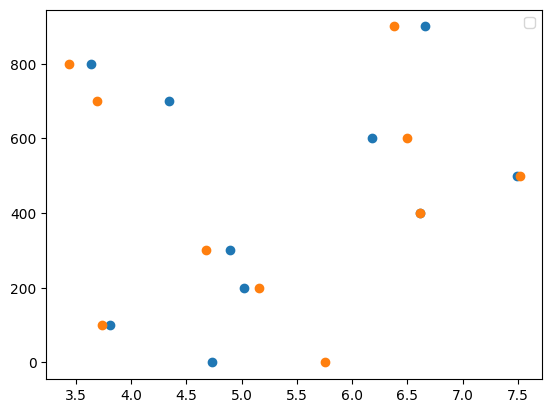

In [86]:
# Visualizing evaluation Metric Score chart
predict=knn.predict(xtest)[0:10]
y=np.arange(0,1000,100)
plt.scatter(x=predict,y=y)
plt.scatter(x=ytest[0:10],y=y)
plt.legend()

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters={"n_neighbors":[7,9,11,13,15,17,19,21]}
gsc=GridSearchCV(knn,param_grid=parameters,cv=5,scoring="r2")
# Fit the Algorithm
gsc.fit(xtrain,ytrain)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21]},
             scoring='r2')

In [88]:
knntraingsc=gsc.predict(xtrain)
knntestgsc=gsc.predict(xtest)

In [89]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(knntraingsc.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(knntraingsc.astype("float"))))
print("R2 score           :  ",r2_score(ytrain,knntraingsc))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(knntestgsc.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(knntestgsc.astype("float"))))
print("R2 score           :  ",r2_score(ytest,knntestgsc))

Training Data Scores
Mean absolute error :  170.79316755413885
Mean squared error :  75390.15070583578
R2 score           :   0.82362458882313
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  187.54046054195825
Mean squared error :  89625.64418708811
R2 score           :   0.7686590465951404


In [90]:
# Predict on the model
r2=r2_score(ytest,knntestgsc)
mse=mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(knntestgsc.astype("float")))
mae=mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(knntestgsc.astype("float")))
model_result["KNN"]=[r2,mae,mse]

##### Which hyperparameter optimization technique have you used and why?

We have used grid search cv in this model to optimse number of neighbours in the knn model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Some amount of change in MAE is found but it is not vary descent in number so we can say that the change is not there model is more or less the same

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [91]:
# ML Model - 3 Implementation
rfregressor = RandomForestRegressor()

# Fit the AlgoriAlgorithmthm
rfregressor.fit(xtrain,ytrain)
rftrain=rfregressor.predict(xtrain)
rftest=rfregressor.predict(xtest)
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(rftrain.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(rftrain.astype("float"))))
print("R2 score           :  ",r2_score(ytrain,rftrain))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(rftest.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(rftest.astype("float"))))
print("R2 score           :  ",r2_score(ytest,rftest))

Training Data Scores
Mean absolute error :  55.118744197990836
Mean squared error :  9569.458200511042
R2 score           :   0.9809178701550936
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  137.5609981107679
Mean squared error :  51422.93318883949
R2 score           :   0.8661572669312201


#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parametersrf  = {'n_estimators': [50, 100, 150],
          'max_depth': [5, 10, 15],
          'min_samples_split': [ 10,20,40,80,160,320],
          'min_samples_leaf': [5,10,20,40]}

gscrf=RandomizedSearchCV(rfregressor,n_jobs=-1,scoring="r2",cv=3,param_distributions=parametersrf,n_iter=100)
# Fit the Algorithm
gscrf.fit(xtrain,ytrain)

# Predict on the model

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [5, 10, 20, 40],
                                        'min_samples_split': [10, 20, 40, 80,
                                                              160, 320],
                                        'n_estimators': [50, 100, 150]},
                   scoring='r2')

In [94]:
gscrf.best_estimator_


RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=150)

In [95]:
rftraingsc=gscrf.predict(xtrain)
rftestgsc=gscrf.predict(xtest)

In [96]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(rftraingsc.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(rftraingsc.astype("float"))))
print("R2 score           :  ",r2_score(ytrain,rftraingsc))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(rftestgsc.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(rftestgsc.astype("float"))))
print("R2 score           :  ",r2_score(ytest,rftestgsc))

Training Data Scores
Mean absolute error :  108.70710263668076
Mean squared error :  33295.25956503019
R2 score           :   0.9246785063163119
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  140.0829735115412
Mean squared error :  52949.337993133995
R2 score           :   0.8530045940392696


In [97]:
mae=mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(rftestgsc.astype("float")))
mse=mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(rftestgsc.astype("float")))
r2=r2_score(ytest,rftestgsc)
model_result["Random Forest"]=[r2,mae,mse]

##### Which hyperparameter optimization technique have you used and why?

We have used grid search cv to tune the model using hyperparameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML model - 4

In [98]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
dttrain  = dt.predict(xtrain)
dttest  = dt.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(dttrain.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(dttrain.astype("float"))))
print("R2 score           :  ",r2_score(ytrain,dttrain))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(dttest.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(dttest.astype("float"))))
print("R2 score           :  ",r2_score(ytest,dttest))

Training Data Scores
Mean absolute error :  0.0
Mean squared error :  0.0
R2 score           :   1.0
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  180.2003937007874
Mean squared error :  96245.50433070866
R2 score           :   0.7599641528870756


#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
parameters={"max_depth":[3,4,5,7],"min_samples_split":[20,40,30,50,60],
           }
gscdt=GridSearchCV(dt,param_grid=parameters,n_jobs=-1,scoring="r2",cv=10)
gscdt.fit(xtrain,ytrain)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7],
                         'min_samples_split': [20, 40, 30, 50, 60]},
             scoring='r2')

In [101]:
gscdt.best_estimator_


DecisionTreeRegressor(max_depth=7, min_samples_split=20)

In [102]:
dttraingsc=gscdt.predict(xtrain)
dttestgsc=gscdt.predict(xtest)

In [103]:
# Visualizing evaluation Metric Score chart
print("Training Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(dttraingsc.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytrain.astype("float")) , transform.inverse_transform(dttraingsc.astype("float"))))
print("R2 score           :  ",r2_score(ytrain,dttraingsc))
print("--"*50)
print()


print("Testing Data Scores")
print("Mean absolute error : ",mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(dttestgsc.astype("float"))))
print("Mean squared error : ",mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(dttestgsc.astype("float"))))
print("R2 score           :  ",r2_score(ytest,dttestgsc))

Training Data Scores
Mean absolute error :  193.21177004623263
Mean squared error :  98659.90275619132
R2 score           :   0.8479247229037554
----------------------------------------------------------------------------------------------------

Testing Data Scores
Mean absolute error :  193.86360259534092
Mean squared error :  96878.07620016208
R2 score           :   0.7896115284159894


In [104]:
r2=r2_score(ytest,dttestgsc)
mse=mean_squared_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(dttestgsc.astype("float")))
mae=mean_absolute_error(transform.inverse_transform(ytest.astype("float")) , transform.inverse_transform(dttestgsc.astype("float")))
model_result["Decision Tree"]=[r2,mae,mse]

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I've used three evaluation metrics R-squared (
), Mean Squared Error (
) and Mean Absolute Error (
).

 R squared measures how much of the variance in the target variable is explained by the model. A high
 score indicates that the model is able to capture a large portion of the variance in the target variable, and therefore is a good fit for the data. From a business perspective, a high score can indicate that the model is accurately predicting the target variable, which can be valuable for decision-making purposes.

 MSE measures the average squared difference between the predicted and actual values. A low score indicates that the model's predictions are close to the actual values. From a business perspective, a low score can indicate that the model is making accurate predictions, which can be valuable for decision-making purposes.

 MAE measures the average absolute difference between the predicted and actual values. Like MSE, a low
 score indicates that the model's predictions are close to the actual values. However,
 is less sensitive to outliers than
. From a business perspective, a low
 score can indicate that the model is making accurate predictions across a wide range of values, which can be valuable for decision-making purposes.

Hence, these evaluation metrics can help a business to assess the performance of a machine learning model and its potential impact on business outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [105]:
pd.DataFrame(model_result,index=["R2","MAE","MSE"]).T

,R2,MAE,MSE
linear_regression,0.670869,266.792902,179208.994594
KNN,0.768659,187.540461,89625.644187
Random Forest,0.853005,140.082974,52949.337993
Decision Tree,0.789612,193.863603,96878.076200


I will be choosing random forest model for the final training and prediction because this model as the above table suggests have the minimum MAE value and also have a generalised model having 85% accuracy or you can say 85% of the variance is explained by the random forest model which is highest among all the models build

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

<BarContainer object of 14 artists>

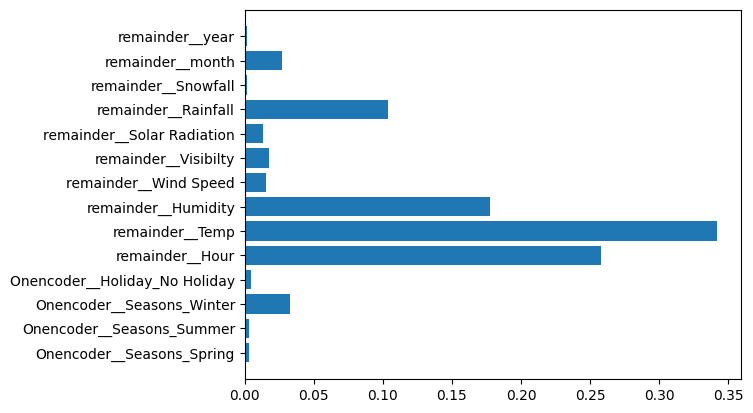

In [106]:
imp=gscrf.best_estimator_.feature_importances_
plt.barh(X.columns,imp)

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [107]:
# Save the File
with open("RandomForestModel.pkl", "wb") as f:
  pickle.dump(gscrf, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [108]:
# Load the File and predict unseen data.
with open("RandomForestModel.pkl", "rb") as f:
  model=pickle.load(f)

r2_score(ytest,model.predict(xtest))

0.8530045940392696

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Here are some solution to increase Rental Bike Demands:
Marketing campaigns: Launch targeted marketing campaigns during seasons when the demand for bike rentals is low, such as winter, to increase awareness and encourage people to rent bikes.
Seasonal pricing: Offer seasonal pricing strategies to encourage customers to rent bikes during low demand seasons.
Location-based pricing: Consider implementing dynamic pricing strategies based on the location of the bike rental stations. Higher demand locations can have higher pricing to ensure that bikes are available for customers in low demand locations.

Offering incentives: Offer incentives such as loyalty programs, discounts, and referral programs to encourage customers to rent bikes and refer friends to do the same.

Demand is highest during rush hour, with a peak in the morning (8-10 am) and the evening (5-7 pm).

Temperature have a significant impact on demand, with demand increasing as the temperature increases up to a certain point (around 30°C for temperature).

Rainfall and snowfall have a negative impact on demand, with demand decreasing as the amount of rainfall or snowfall increases.

Demand is lower on holidays compared to non-holidays.

RandomForest model performed best for predicting bike rental demand, highest score 0.85 approx and MAE of approx 140.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***